In [ ]:
from scipy import integrate
from scipy.integrate import quad

**General Integration**

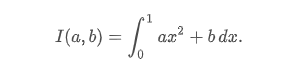

In [ ]:
def intg(x,a,b):
  return a*x**2 + b

In [ ]:
a=1
b=2
I=quad(intg,0,1,args=(a,b))

In [ ]:
print(I)

(2.3333333333333335, 2.590520390792032e-14)


The quad function returns the two values, in which the first number is the value of integral and the second value is the estimate of the absolute error in the value of integral.

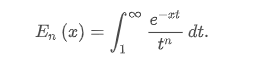

In [ ]:
import numpy as np

In [ ]:
def integ(t,n,x):
  return np.exp(-x*t)/ t**n

In [ ]:
n=3
x=2
I=quad(integ,1,np.inf,args=(n,x))
I

(0.03013337979781598, 1.329606578675267e-10)

In [ ]:
def expint(n,x):
  return quad(integ,1,np.inf,args=(n,x))[0]


In [ ]:
vec_expint = np.vectorize(expint)  

# Define a vectorized function which takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays. 

In [ ]:
vec_expint(3,np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

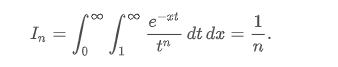

In [ ]:
result=quad(lambda x: expint(3, x),0,np.inf)
result

(0.33333333325010883, 2.8604069921197956e-09)

**General multiple integration (dblquad, tplquad, nquad)**

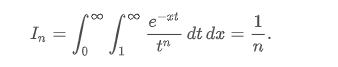

In [ ]:
from scipy.integrate import quad, dblquad

In [ ]:
def II(n):
  return dblquad(lambda t,x : np.exp(-x*t) /t**n,0,np.inf,lambda x:1,lambda x:np.inf)

In [ ]:
II(4)

(0.2500000000043577, 1.2983033469368098e-08)

In [ ]:
f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)

(0.6666666666666667, 7.401486830834377e-15)

In [ ]:
from numpy import exp
from math import sqrt
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
i = integrate.dblquad(f, 0, 0.5, g, h)
print(i)

(0.5, 1.7092350012594845e-14)


**Nquad**

Integration over multiple variables. Wraps quad to enable integration over multiple variables. Various options allow improved integration of discontinuous functions, as well as the use of weighted integration, and generally finer control of the integration process.

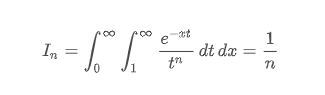

In [ ]:
N = 5
def f(t, x):
   return np.exp(-x*t) / t**N

integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986131e-08)

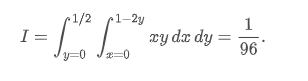

In [ ]:
def f(x, y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]
    
integrate.nquad(f, [bounds_x, bounds_y])    

(0.010416666666666668, 4.101620128472366e-16)

**Tplquad**

In [ ]:
f = lambda z, y, x: x*y*z
integrate.tplquad(f, 1, 2, lambda x: 2, lambda x: 3,
                  lambda x, y: 0, lambda x, y: 1)

(1.8750000000000002, 3.324644794257407e-14)

In [ ]:
f = lambda x, y,z: 16*x*y*z
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
m = lambda x,y : 0
n = lambda x,y :1
i = integrate.tplquad(f, 0, 0.5, g,h,m,n)
print(i)



(0.25, 2.2147980598462283e-14)


**Gaussian quadrature**

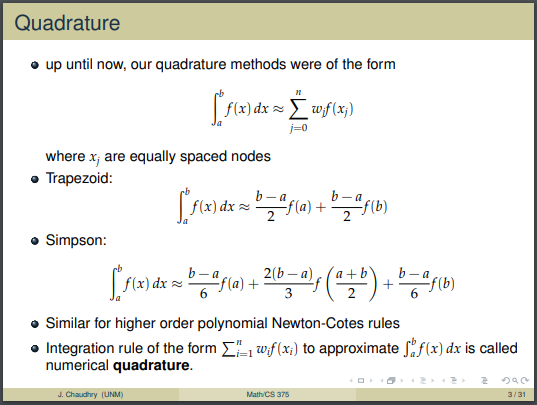

**Scipy.integrate.fixed_quad**

Compute a definite integral using fixed-order Gaussian quadrature.

Integrate func from a to b using Gaussian quadrature of order n.

A few functions are also provided in order to perform simple Gaussian quadrature over a fixed interval. The first is **fixed_quad**, which performs fixed-order Gaussian quadrature. The second function is **quadrature**, which performs Gaussian quadrature of multiple orders until the difference in the integral estimate is beneath some tolerance supplied by the user. These functions both use the module scipy.special.orthogonal, which can calculate the roots and quadrature weights of a large variety of orthogonal polynomials (the polynomials themselves are available as special functions returning instances of the polynomial class — e.g., special.legendre)

In [ ]:
f = lambda x: x**8
integrate.fixed_quad(f, 0.0, 1.0, n=4)

(0.1110884353741496, None)

In [ ]:
integrate.fixed_quad(f, 0.0, 1.0, n=5) 

(0.11111111111111102, None)

In [ ]:
integrate.fixed_quad(np.cos, 0.0, np.pi/2, n=4)

(0.9999999771971152, None)

**scipy.integrate.quadrature**

Compute a definite integral using fixed-tolerance Gaussian quadrature.

Integrate func from a to b using Gaussian quadrature with absolute tolerance tol.

In [ ]:
f = lambda x: x**8
integrate.quadrature(f, 0.0, 1.0)

(0.11111111111111106, 4.163336342344337e-17)

In [ ]:
integrate.quadrature(np.cos, 0.0, np.pi/2)

(0.9999999999999536, 3.9611425250996035e-11)

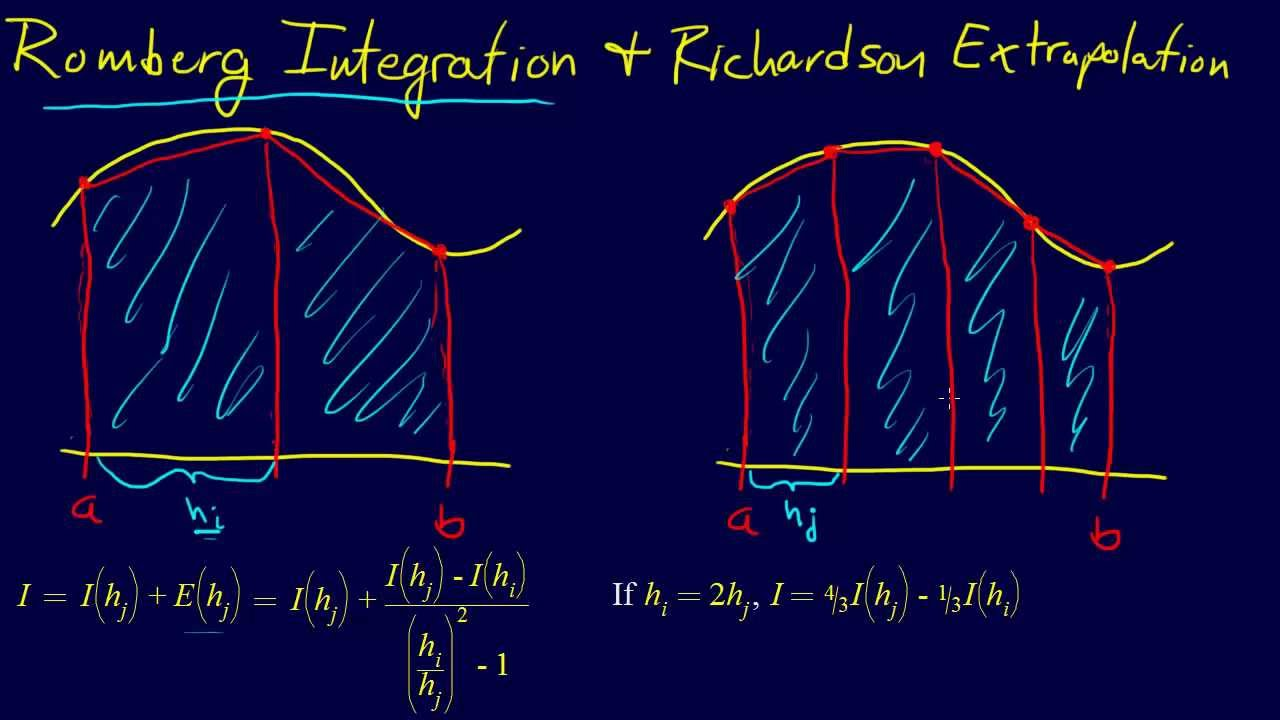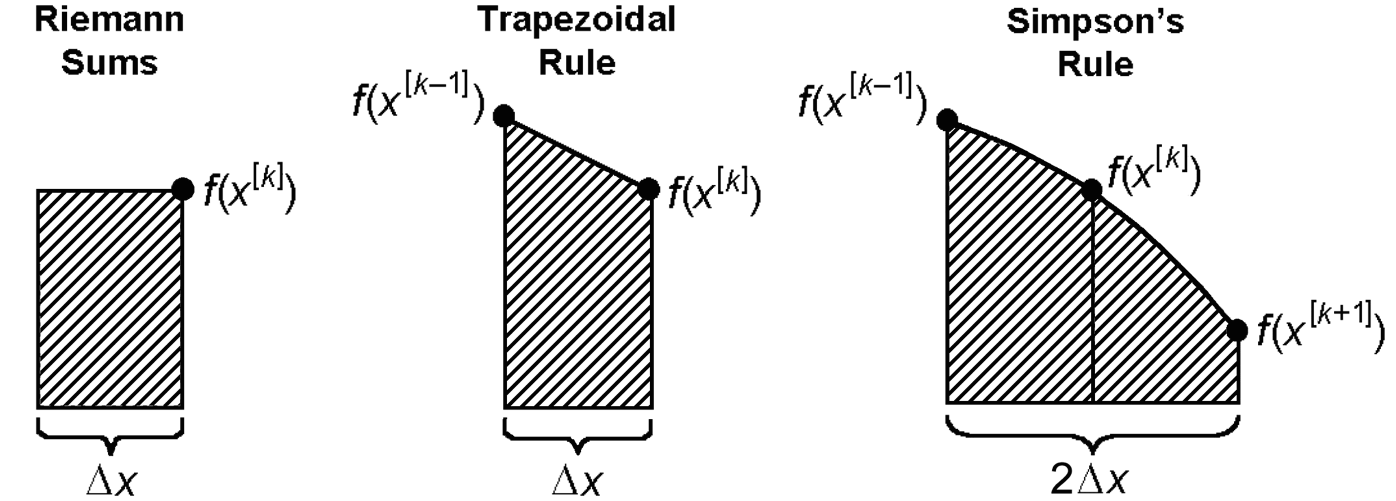

**Romberg Integration**

Romberg integration of a callable function or method.

Returns the integral of function (a function of one variable) over the interval (a, b).

If show is 1, the triangular array of the intermediate results will be printed. If vec_func is True (default is False), then function is assumed to support vector arguments.

In [ ]:
from scipy.special import erf
gaussian = lambda x: 1/np.sqrt(np.pi) * np.exp(-x**2)
result = integrate.romberg(gaussian, 0, 1, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f58806368c0> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.385872 
     2  0.500000  0.412631  0.421551 
     4  0.250000  0.419184  0.421368  0.421356 
     8  0.125000  0.420810  0.421352  0.421350  0.421350 
    16  0.062500  0.421215  0.421350  0.421350  0.421350  0.421350 
    32  0.031250  0.421317  0.421350  0.421350  0.421350  0.421350  0.421350 

The final result is 0.421350396474754 after 33 function evaluations.


**Integrating using Samples**

In [ ]:
import numpy as np
def f1(x):
   return x**2

def f2(x):
   return x**3

x = np.array([1,3,4])
y1 = f1(x)

I1 = integrate.simps(y1, x)
print(I1)

21.0


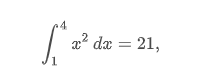

In [ ]:
x = np.array([1,3,4])
y2 = f2(x)
I2 = integrate.simps(y2, x)
print(I2)

61.5


**Ordinary differential equations**

Integrating a set of ordinary differential equations (ODEs) given initial conditions is another useful example. The function **solve_ivp** is available in SciPy for integrating a first-order vector differential equation:

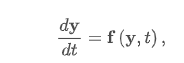